## Boom Bikes sharing

<b>Problem Statement and Goal <b>:
    
    Based on the survey data provided, The company wants to know:
    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands
    Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 
    

<b>Steps involved<b>
    
    Step 1: Read the data from the source 
    Step 2: Understand The data 
    Step 3: EDA 
    Step 4: Creation of dummy variables
    Step 5: Train and test split 
    Step 6: Scaling 
    Step 7: Feature Selection 
    Step 8: Evaluate Test set
    Step 9: Answer the business questions

## Data perp

In [57]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
#read required data

df = pd.read_csv("D:\MSC_Works\github\Boom bikes\day.csv")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [40]:
# describing the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [41]:
#Target variable: cnt
#Based on the data dictionary shared, we can drop the below fields as they are not effective
  #   instant(since record index wont add any value)
  #   dteday(As the data already have yr, month, holiday classifications)
  #   casual & registered (since we already have total user count - cnt, we can drop these fields)

df.drop(['instant','casual','registered','dteday'], axis=1, inplace=True)
print(df.shape)

(730, 12)


In [42]:
#check missing values in data column and row wise 

#check the nulls column wise
null_columns = df.isnull().all(axis=0).sum()
print('Count of empty columns: {}'.format(null_columns))

#check the nulls row  wise
null_rows = df.isnull().all(axis=1).sum()
print('Count of Columns with missing values: {}'.format(null_rows))
 
#Observation: there are no missing values    

Count of empty columns: 0
Count of Columns with missing values: 0


In [43]:
#mapping to original values based on data dictionary

column_maps = {
    'season': {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'},
    'mnth': {
        1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr',
        5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',
        9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'
    },
    'weekday': {0: 'Tues', 1: 'Weds', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon'},
    'weathersit': {1: 'clear', 2: 'mist', 3: 'light snow', 4: 'heavy rain'}
}

# Update columns based on data dictionaries
for column, value_map in column_maps.items():
    df[column] = df[column].map(value_map)

# Display unique values after mapping
for column in column_maps:
    print(df[column].unique())

# Display the first few rows of the updated dataframe
df.head()

['spring' 'summer' 'fall' 'winter']
['jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'oct' 'nov' 'dec']
['Mon' 'Tues' 'Weds' 'Thurs' 'Fri' 'Sat' 'Sun']
['mist' 'clear' 'light snow']


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Weds,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Analysis

In [44]:
#box plot function

def box_plot(df,x_col,y_col):
    sns.boxplot(x=x_col, y=y_col, data=df)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels,bbox_to_anchor=(1.05, 0.5), loc='center left')
    plt.show()

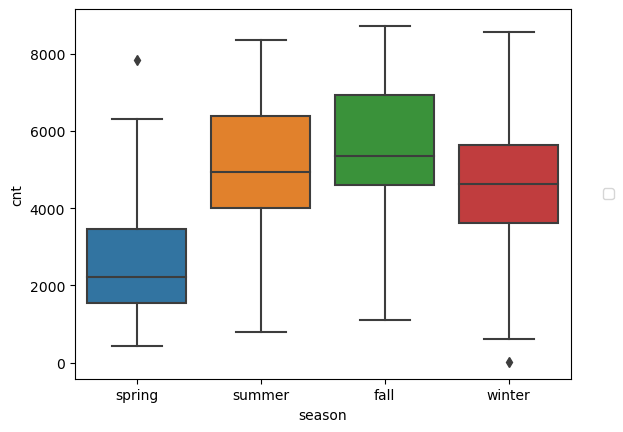

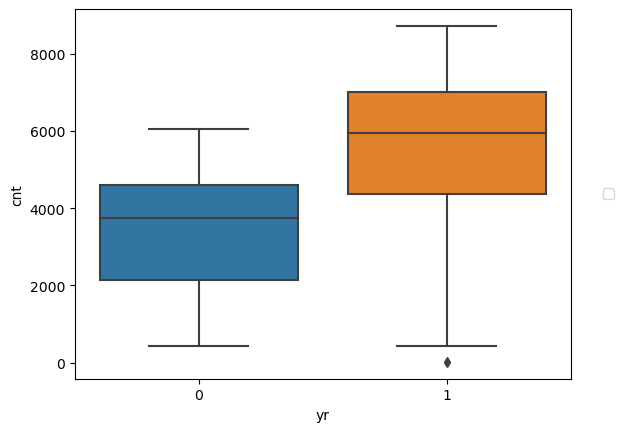

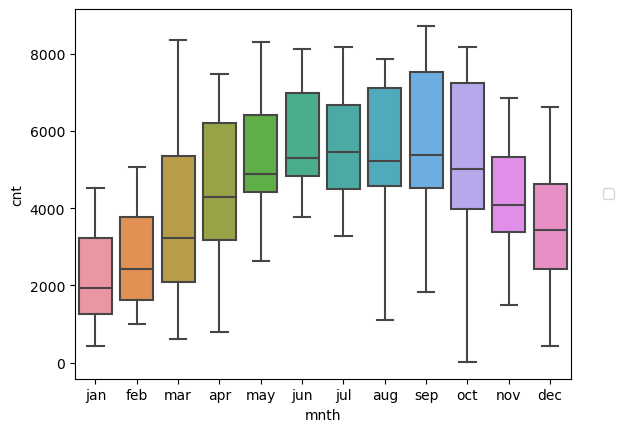

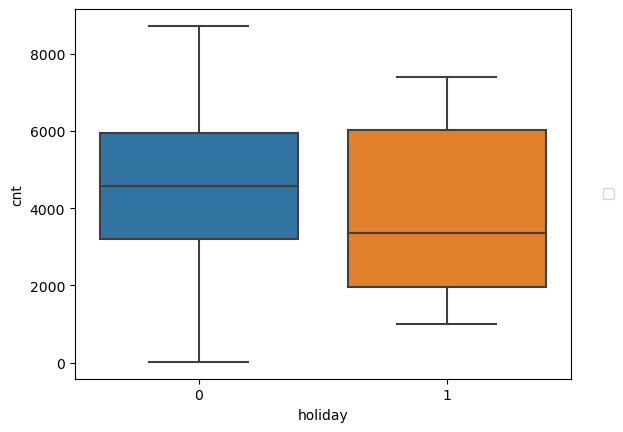

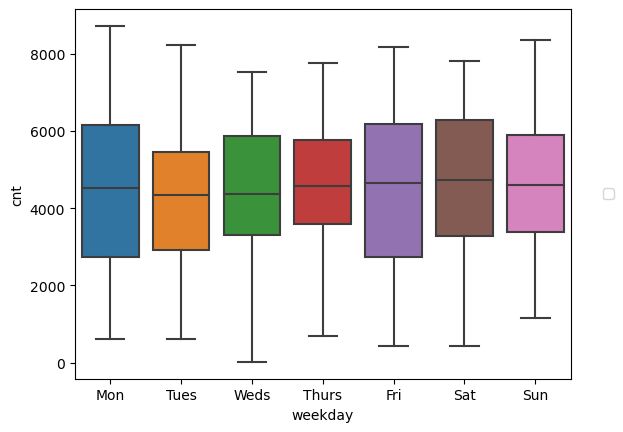

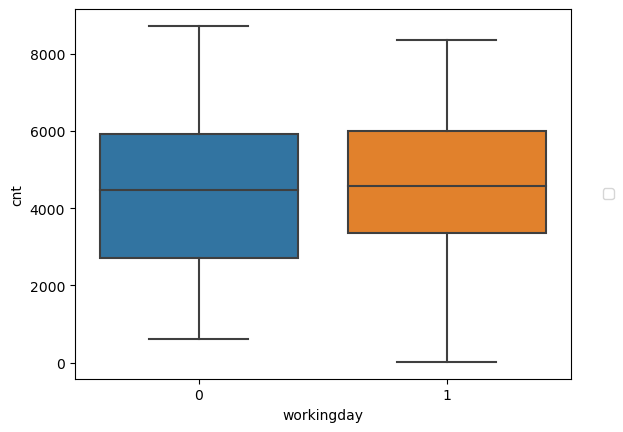

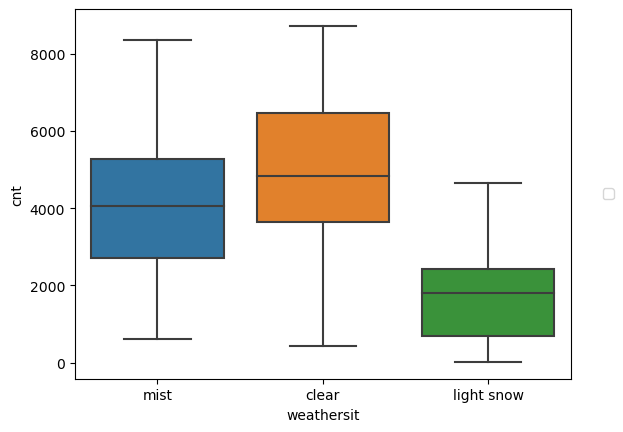

[None, None, None, None, None, None, None]

In [45]:
#create box plot to see outliers
cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
[box_plot(df=df,x_col=x,y_col='cnt') for x in cols]

<function matplotlib.pyplot.show(close=None, block=None)>

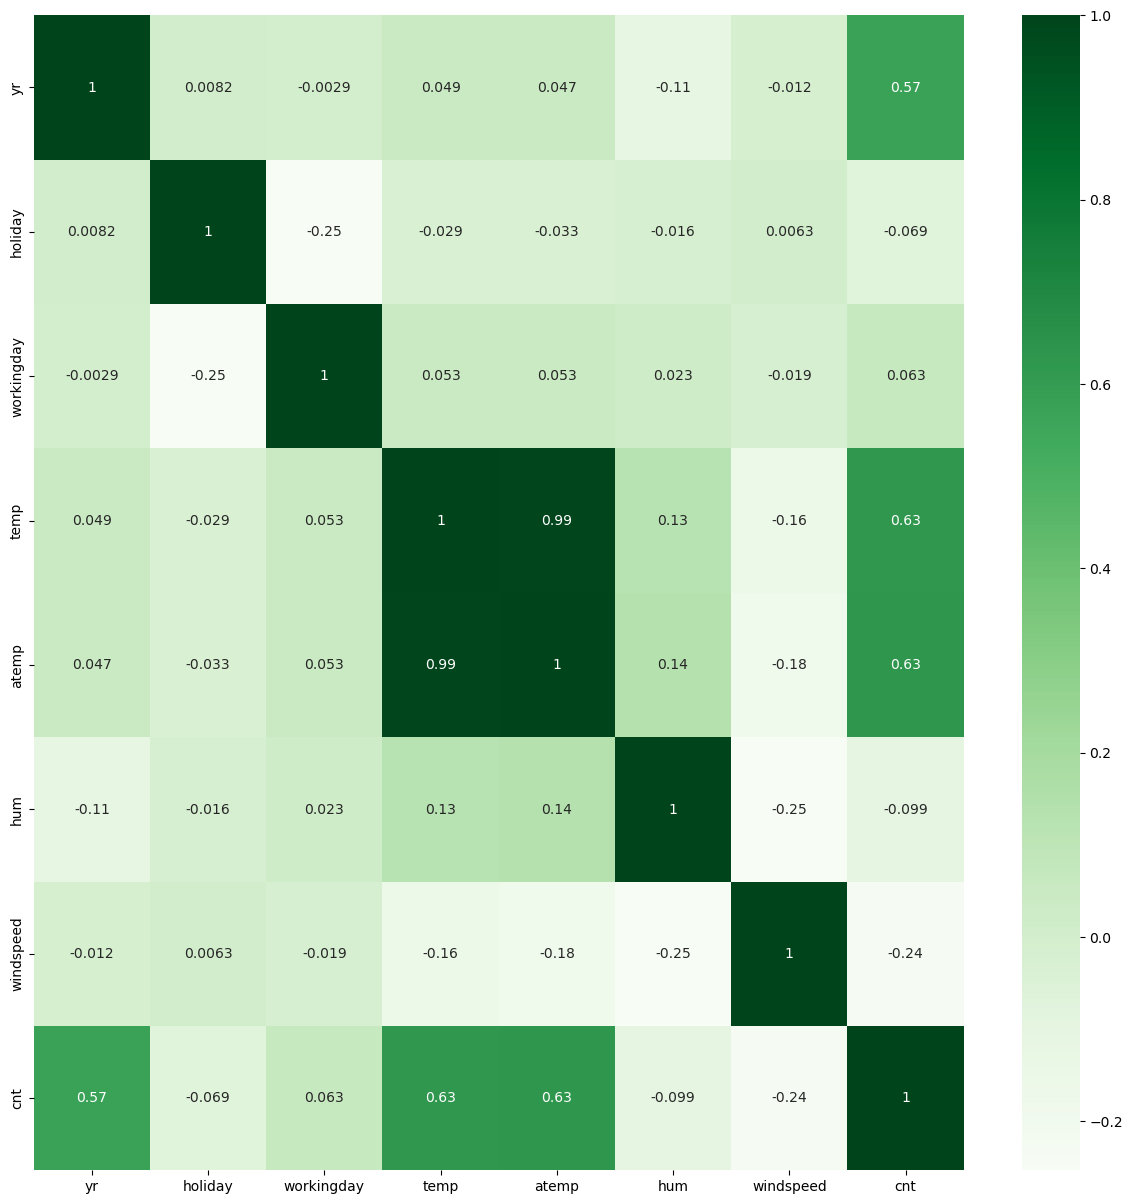

In [46]:
# Correlaration matrix 
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns


plt.figure(figsize=(15,15))
sns.heatmap(numeric_df.corr(),cmap='Greens',annot=True)
plt.show

#observation: atemp and temp are correlated.

In [47]:
#create dummies #first columnn dropped since it can be derived from others

# Create dummy variables
seasons = pd.get_dummies(df['season'], drop_first=True, dtype=int)
mnth = pd.get_dummies(df['mnth'], drop_first=True, dtype=int)
weekdays = pd.get_dummies(df['weekday'], drop_first=True, dtype=int)
weathersits = pd.get_dummies(df['weathersit'], drop_first=True, dtype=int)

# Add the dummy variables to the original dataframe
df = pd.concat([df, seasons, mnth, weekdays, weathersits], axis=1)

# Drop the original categorical columns
df = df.drop(['season', 'weathersit', 'mnth', 'weekday'], axis=1)

# Display the first few rows of the updated dataframe
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Weds,light snow,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
print(df.shape)
df.head()

(730, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Weds,light snow,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Split (Test/Train)

In [50]:
df_train, tf_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling Features

In [53]:
scaler = MinMaxScaler()


In [54]:
# Apply scaler() to all the continuous variables except categorical & dummy variables

cols = ['cnt', 'atemp','hum', 'windspeed']

df_train[cols] = scaler.fit_transform(df_train[cols])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Weds,light snow,mist
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [55]:
df_train[cols].describe()

,cnt,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.513620,0.512989,0.650369,0.320768
std,0.224593,0.212385,0.145882,0.169797
min,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.332086,0.538643,0.199179
50%,0.518638,0.526811,0.653714,0.296763
75%,0.684710,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


# dependent & independent variable split

In [56]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model buliding

## Hybrid (RFE + Manual)

In [58]:

# Running the RFE with the output number of the variable equal to 15 and 1 (step) variable at a time
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', False, 10),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 11),
 ('Thurs', False, 9),
 ('Tues', False, 7),
 ('Weds', False, 8),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [62]:
print('selected_Cols:')
selected_col = X_train.columns[rfe.support_]
selected_col

selected_Cols:


Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'jan', 'jul', 'nov', 'sep', 'Mon', 'light snow', 'mist'],
      dtype='object')

In [63]:
print('removed_cols:')
removed_cols = X_train.columns[~rfe.support_]
removed_cols

removed_cols:


Index(['workingday', 'temp', 'summer', 'aug', 'feb', 'jun', 'mar', 'may',
       'oct', 'Sat', 'Sun', 'Thurs', 'Tues', 'Weds'],
      dtype='object')

In [65]:
#
# Building model using statsmodel, for the detailed statistics
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[selected_col]

In [66]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [67]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [68]:
#Summary of the linear model
print(lm.summary())

# review : p  values for "Mon" > 0.05 indicating insignificance in the model training

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          9.67e-187
Time:                        06:18:36   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3662      0.032     11.425      0.0

In [69]:
#dropping "Mon" feature since it has p value > 0.05 as it is not a significant variable
X_train_rfe = X_train_rfe.drop(['Mon'], axis=1)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.58e-187
Time:                        06:25:12   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3704      0.032     11.578      0.0

In [70]:
#dropping the const before calculating VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# review :  VIF of hum isvery high and > 10 , hence we need to drop it to attain a optimal model

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,winter,2.93
5,spring,2.89
13,mist,2.26
0,yr,2.06
10,nov,1.82
8,jan,1.75
7,dec,1.54


In [71]:
# dropping "hum" feature
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

# review : Prob (F-statistic) < 0.05 and all the p values are below 0.05 which indicates the model is a good fit

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          3.95e-185
Time:                        06:26:30   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2931      0.026     11.396      0.0

In [72]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# review : VIFs for all the features < 10 , hence we conclude that the model is optimal

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,winter,2.55
4,spring,2.35
0,yr,2.06
9,nov,1.80
7,jan,1.65
12,mist,1.53
6,dec,1.46
8,jul,1.35


## Residual analysis

In [73]:
y_train_price = lm.predict(X_train_rfe)

In [74]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

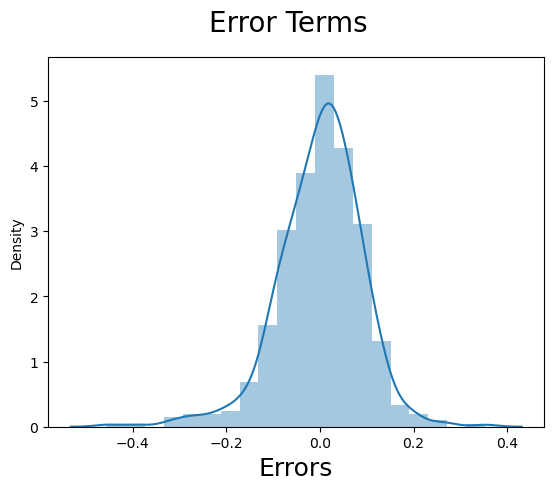

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

# review : Normal distribution

In [80]:
#### Applying the scaling on the test sets
cols = ['cnt', 'atemp','hum', 'windspeed']
tf_test[cols] = scaler.transform(tf_test[cols])
tf_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Weds,light snow,mist
184,0,1,0,29.793347,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [84]:
tf_test[cols].describe()

,cnt,atemp,hum,windspeed
count,219.000000,219.000000,219.000000,219.000000
mean,0.520592,0.532991,0.638508,0.313350
std,0.218435,0.217888,0.148974,0.159947
min,0.048205,0.025950,0.261915,-0.042808
25%,0.377531,0.344751,0.527265,0.198517
50%,0.524275,0.549198,0.627737,0.299459
75%,0.672745,0.714132,0.743928,0.403048
max,0.963300,0.980934,1.002146,0.807474


In [ ]:
#Input output split

In [85]:
y_test = tf_test.pop('cnt')
X_test = tf_test

In [86]:
# Make predictions using the model.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [87]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

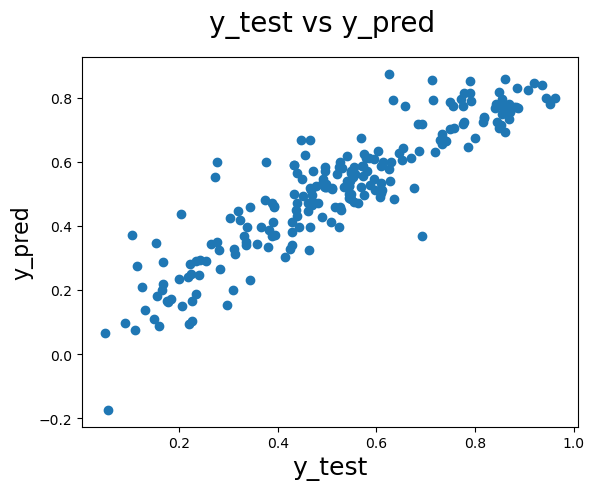

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                         

# review : y test and y pred are closely correlated indicating model is a good fit

In [89]:
#calculate the R-squared score on the test set.

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred).round(3)

r2

0.818

In [91]:
# formula : adjusted_R2 = 1-((1-r2)(n-1)/n-p-1) p = number of predictors n = sample size

n = int(X_test_new.shape[0])
print("The sample size {}".format(n))
p = int(X_test_new.shape[1])
print("The p value {}".format(p))

r_adj_test = 1-(1-r2)*(n-1)/(n-p-1)
r_adj_test=r_adj_test.round(3)
print("The adjusted R^2 value value {}".format(r_adj_test))

                            

The sample size 219
The p value 14
The adjusted R^2 value value 0.806


In [ ]:
#reivew : final model has R-squared (adj) = 0.832 and we got on test set as 0.806